In [4]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")  #veri setimizi çekiyoruz

In [5]:
type(dataset), type(dataset["data"]), type(dataset["data"])

(sklearn.utils.Bunch, numpy.ndarray, numpy.ndarray)

In [6]:
X, y = dataset["data"], dataset["target"]  # veri seti ve etiket

In [7]:
X = X/255  # verileri 0 ve 1 aralığına çekelim.

In [8]:
X.shape  # 7000 adet resim her biri 28 x 28

(70000, 784)

In [9]:
y.shape    #her bir satırda bir etiket

(70000,)

In [10]:
img_1 = X[1,:].reshape(28,28) 

In [11]:
import matplotlib.pyplot as plt

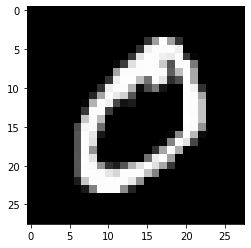

In [12]:
plt.imshow(img_1,cmap='gray')
plt.show()

In [13]:
y[1]

'0'

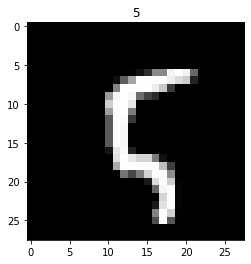

In [14]:
i=100
img_1 = X[100,:].reshape(28,28)
plt.imshow(img_1,cmap='gray')
plt.title(y[i])
plt.show()

In [15]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new
print(y)

m = 60000 #train için kullanılacak veri
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)


[0. 0. 0. ... 0. 0. 0.]


In [16]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)  
X_train, y_train = X_train[:,shuffle_index], y_train[:,shuffle_index]

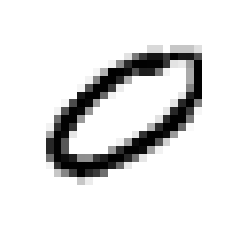

[0.]


In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 3
plt.imshow(X_train[:,1].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [18]:
# sigmoid aktivasyon fonksiyonu 
epsilon = 1e-5
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [19]:
# kayıp değeri
def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    l = -(1./m) * (np.sum(np.multiply(np.log(Y_hat+epsilon),Y)) + np.sum(np.multiply(np.log(1-Y_hat+epsilon),(1-Y))))
    return l

In [ ]:
learning_rate = 1 # öğrenme değeri
X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))
for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    cost = compute_loss(Y,A)
    
    dW = (1/m)*np.matmul(X, (A-Y).T)
    db = (1/m)*np.sum(A-Y, axis=1, keepdims=True)
    
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    if(i%100==0):
        print("Epoch", i, "cost: ", cost)
print("final cost: ", cost)

Epoch 0 cost:  0.6780211644256914
Epoch 100 cost:  7.076902320959276e-06
Epoch 200 cost:  6.788042310395334e-06
Epoch 300 cost:  6.5095366694105145e-06
Epoch 400 cost:  6.2408235413021445e-06
Epoch 500 cost:  5.981381523350084e-06
Epoch 600 cost:  5.730726063487384e-06
Epoch 700 cost:  5.488406237169822e-06
Epoch 800 cost:  5.254001858304988e-06
Epoch 900 cost:  5.027120884411433e-06
Epoch 1000 cost:  4.807397081508445e-06
Epoch 1100 cost:  4.594487918813504e-06
Epoch 1200 cost:  4.388072667200993e-06


In [ ]:
y_test[0,100] = 1.0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels)) 

In [ ]:
print(classification_report(predictions, labels)) # raporlama